In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install idx2numpy

import tensorflow.keras as keras
import tensorflow as tf
import idx2numpy
import cv2 as cv
import numpy as np
import gzip
import pickle
import matplotlib.pyplot as plt

from  tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

train_data_path = '/content/gdrive/My Drive/data3/train-images-idx3-ubyte.gz'
test_data_path = '/content/gdrive/My Drive/data3/t10k-images-idx3-ubyte.gz'
train_label_path = '/content/gdrive/My Drive/data3/train-labels-idx1-ubyte.gz'
test_label_path = '/content/gdrive/My Drive/data3/t10k-labels-idx1-ubyte.gz'
print(train_data_path)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/data3/train-images-idx3-ubyte.gz


In [0]:
class MiniBatch_GD():

	def __init__(self):
		self.network = keras.Sequential()
		self.network.add(keras.layers.Conv2D(32, kernel_size=3, kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01), activation='sigmoid', input_shape=(28,28,1)))
		self.network.add(keras.layers.BatchNormalization())
		self.network.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
		self.network.add(keras.layers.Dropout(0.1))
		self.network.add(keras.layers.Conv2D(64, kernel_size=3, kernel_regularizer=keras.regularizers.l2(0.01),bias_regularizer=keras.regularizers.l2(0.01), activation='sigmoid'))
		self.network.add(keras.layers.BatchNormalization())
		self.network.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
		self.network.add(keras.layers.Dropout(0.3))
		self.network.add(keras.layers.Flatten())
		self.network.add(keras.layers.Dense(10, activation='softmax'))

	def extract_data(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(16)
			buf = f.read(28 * 28 * num_img)
			train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
			train_data = train_data.reshape(num_img, 28, 28, 1)
			return train_data

	def extract_labels(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(8)
			buf = f.read(num_img)
			labels= np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
			# labels = labels.reshape(num_img, 28, 28, 1)
			return labels


In [10]:
mbgd = MiniBatch_GD()

train_data = mbgd.extract_data(train_data_path, 60000)
train_labels = mbgd.extract_labels(train_label_path, 60000)
test_data = mbgd.extract_data(test_data_path, 10000)
test_labels = mbgd.extract_labels(test_label_path, 10000)


Fd =open('/content/gdrive/My Drive/data3/Network_Best_one.h5', 'w+') 
Fd.close()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
opt = keras.optimizers.SGD(lr = 0.001 , momentum = 0.9)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)
cs= ModelCheckpoint(filepath='/content/gdrive/My Drive/data3/Network_Best_one.h5', monitor='val_loss', save_best_only=True)
mbgd.network.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist = mbgd.network.fit(train_data, train_labels, batch_size = 170, validation_data=(test_data, test_labels), epochs=300, callbacks = [es,cs])
mbgd.network.save('/content/gdrive/My Drive/data3/Network_config_three.h5')
with open('/content/gdrive/My Drive/data3/History_config_three', 'wb') as file:
  pickle.dump(hist.history, file)


Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 10s 168us/sample - loss: 1.1791 - acc: 0.7272 - val_loss: 0.9156 - val_acc: 0.8184
Epoch 2/300
60000/60000 [==============================] - 3s 48us/sample - loss: 0.8921 - acc: 0.8061 - val_loss: 0.7908 - val_acc: 0.8382
Epoch 3/300
60000/60000 [==============================] - 3s 48us/sample - loss: 0.7976 - acc: 0.8285 - val_loss: 0.7177 - val_acc: 0.8497
Epoch 4/300
60000/60000 [==============================] - 3s 48us/sample - loss: 0.7210 - acc: 0.8376 - val_loss: 0.6621 - val_acc: 0.8537
Epoch 5/300
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6595 - acc: 0.8494 - val_loss: 0.6196 - val_acc: 0.8582
Epoch 6/300
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6118 - acc: 0.8551 - val_loss: 0.5988 - val_acc: 0.8553
Epoch 7/300
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5730 - acc: 0.8597 - val

OUTPUT FROM BEST MODEL
10000/10000 - 1s - loss: 0.3052 - acc: 0.8962


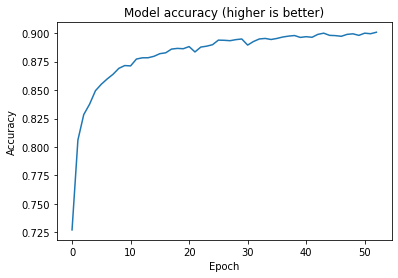

In [12]:

print("OUTPUT FROM BEST MODEL")
#Bestmodel = MiniBatch_GD()
mbgd.network.load_weights('/content/gdrive/My Drive/data3/Network_Best_one.h5')
oss, acc = mbgd.network.evaluate(test_data,  test_labels, verbose=2)






import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()